# Statistics Challenge (Optional)

Use the `orders.csv` dataset in the same directory to complete this challenge.

**Background**:

There are exactly 100 sneaker shops on a sneaker retailing website, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

**Questions**:

- What went wrong with this metric (AOV) and the current analysis in general. Support your answers with appropriate visualizations.

- Propose a new metric that better represents the behavior of the stores' customers. Why are these metrics better and what are their values?

- Using the `created_at` column as a proxy for the date and time of order creation, provide a brief analysis of the trends in the customers' purchasing behavior.

Show all of your work in this notebook.

In [133]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [134]:
data = pd.read_csv("orders.csv")

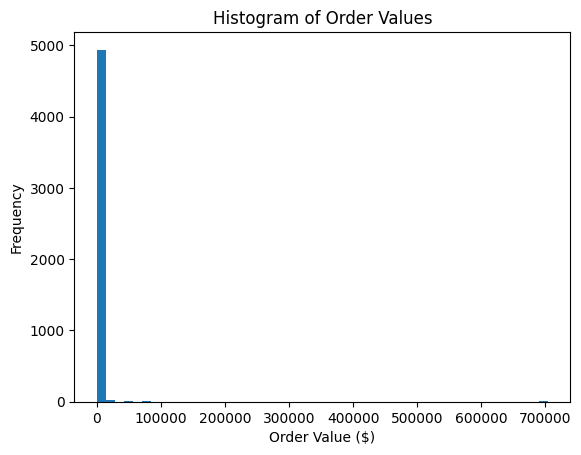

In [135]:
plt.hist(data['order_value'], bins=50)
plt.title('Histogram of Order Values')
plt.xlabel('Order Value ($)')
plt.ylabel('Frequency')
plt.show()


Distribution has very large outliers. From this graph we can see that most orders lie much below 100k. 

In [136]:
# Finding the median
data["order_value"].median(), data["order_value"].mean()

(284.0, 3145.128)

As we can see, the median and mean differ by quite a bit. This indicates that the outliers are having a very strong pull on the total mean of the graph. Either we can just utilize the median to get a better understanding of the AOV, or we can remove the outliers from the graph.

In [137]:
upper_limit = data['order_value'].quantile(0.95)

In [138]:
# getting data only below the upper limit
data_no_outlier = data[data['order_value'] < upper_limit]

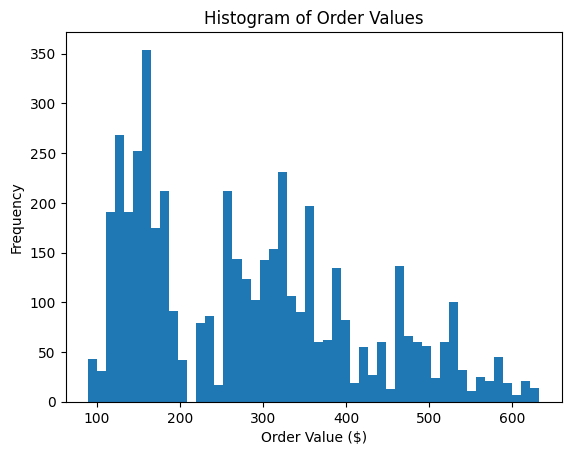

In [139]:
plt.hist(data_no_outlier['order_value'], bins=50)
plt.title('Histogram of Order Values')
plt.xlabel('Order Value ($)')
plt.ylabel('Frequency')
plt.show()

Removing the top 5% of the graph shows a much more normal distribution of order values excluding the ones that were in the hundreds of thousands.

In [140]:
data_no_outlier["order_value"].mean()

284.1813198397639

Now we see the mean line much more closely with the median. Therefore, the AOV of a shoe excluding the outliers in this data set is around $280.

# Customer Trends

In [141]:
# converting created at to datetime format
data['created_at'] = pd.to_datetime(data['created_at'])

# extracting values
data['day_of_week'] = data['created_at'].dt.day_name()
data['hour'] = data['created_at'].dt.hour
data['day_of_month'] = data['created_at'].dt.day


Graphing Trends

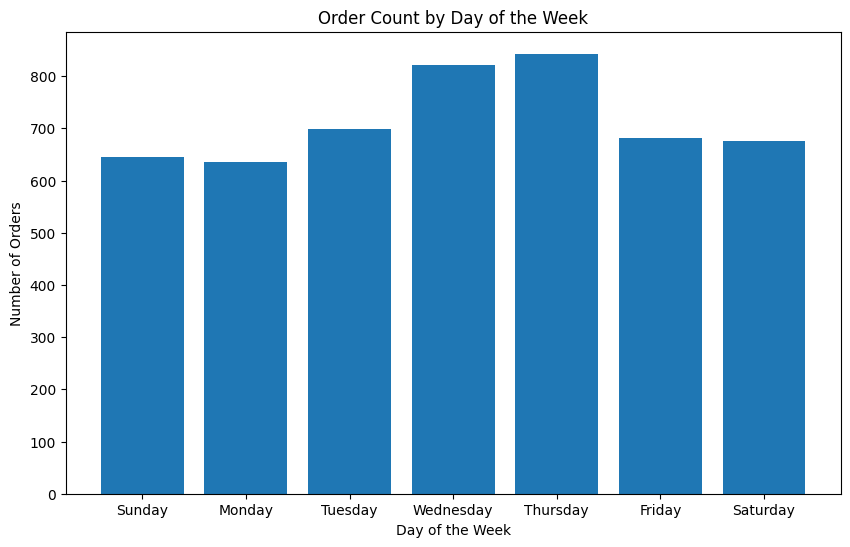

In [142]:
weekday_orders = data.groupby(data['day_of_week']).size().reindex(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

plt.figure(figsize=(10,6))
plt.bar(weekday_orders.index, weekday_orders.values)
plt.title('Order Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.show()

More prevelent during the middle of the week

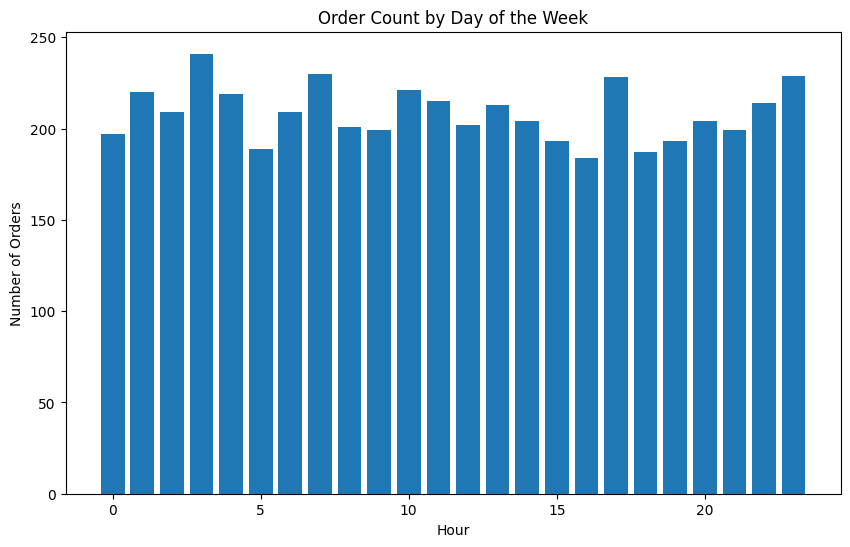

In [143]:
hour = data.groupby(data['hour']).size()

plt.figure(figsize=(10,6))
plt.bar(hour.index, hour.values)
plt.title('Order Count by Day of the Week')
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.show()

Seems to not be too much correlation

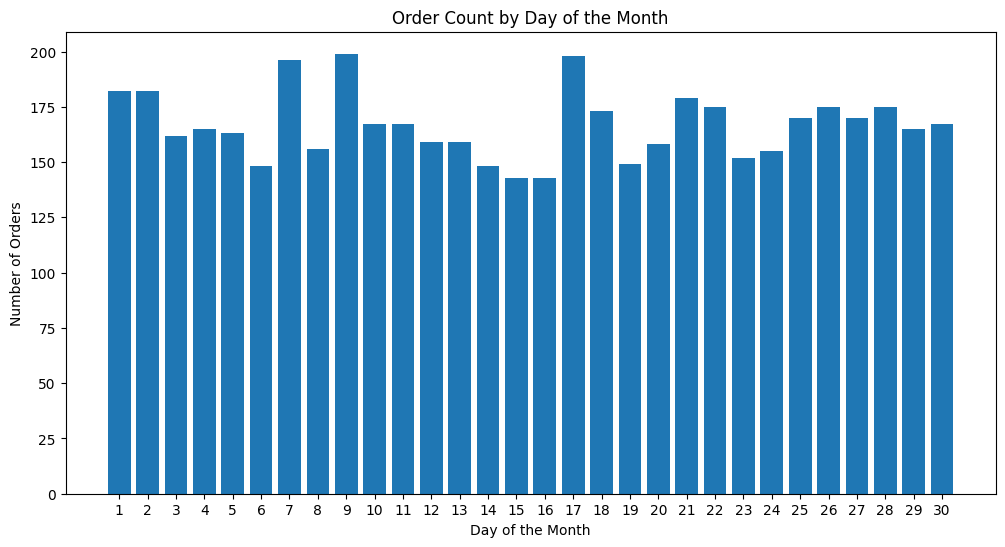

In [144]:
day_of_month_orders = data.groupby('day_of_month').size()
plt.figure(figsize=(12, 6))
plt.bar(day_of_month_orders.index, day_of_month_orders.values)
plt.title('Order Count by Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Orders')
plt.xticks(range(1, 31))  
plt.show()


There seems to be a lot of orders on some days and less on others. This may be in correspondance with the day of the week

In [149]:
color_mapping = {
    'Monday': 'red',
    'Tuesday': 'orange',
    'Wednesday': 'yellow',
    'Thursday': 'green',
    'Friday': 'blue',
    'Saturday': 'indigo',
    'Sunday': 'violet'
}
colors = data.groupby('day_of_month')['day_of_week'].first().map(color_mapping)

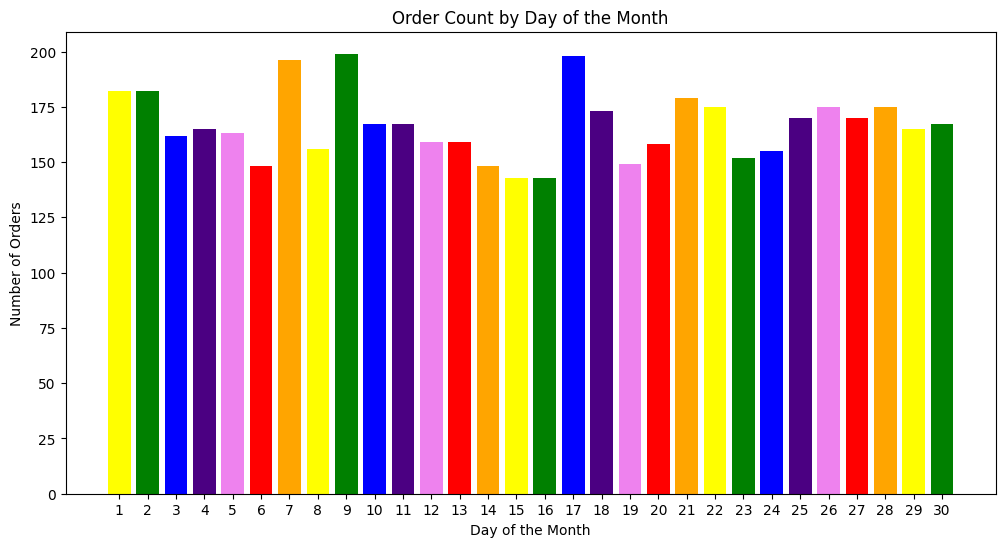

In [147]:
plt.figure(figsize=(12, 6))
plt.bar(day_of_month_orders.index, day_of_month_orders.values, color=colors)
plt.title('Order Count by Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Orders')
plt.xticks(range(1, 31))  
plt.show()


As seen by this, the days of the week seems to not be too influential on orders. There seems to be a burst, then a down spiral to another burst